In [1]:
import os, sys
import uproot, awkward
import ROOT as rt
import numpy as np
from array import array
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

Welcome to JupyROOT 6.26/02


In [3]:
inFile_k100 = "/Users/shubhampandey/work/geant4/k100sim_anthony/sim_files/sim_300M_PuBe_sourceAndshields_boronBox_walls_shields/sim_300M_PuBe_sourceAndshields_boronBox_walls_floor_boronShield_V6H6_1inch_nrCascade_step4.root"
file_k100 = uproot.open(inFile_k100)
if(not file_k100):
    print("could not open file: %s"%(inFile_k100))
    sys.exit(0)
    
tree_k100 = file_k100["simtree"]

if(not tree_k100):
    print("simtree does not exist in file: %s"%(file_k100))
    sys.exit(0)

# From k100sim
eventid = tree_k100["eventid"].array(library="np")
nCap_flag = tree_k100["nCap_flag"].array(library="np")
P = tree_k100["P"].array(library="np")
Type = tree_k100["Type"].array(library="np")
TS = tree_k100["TS"].array(library="np")
DT = tree_k100["DT"].array(library="np")
E1 = tree_k100["E1"].array(library="np")
D3 = tree_k100["D3"].array(library="np")
X1 = tree_k100["X1"].array(library="np")
Y1 = tree_k100["Y1"].array(library="np")
Z1 = tree_k100["Z1"].array(library="np")
X3 = tree_k100["X3"].array(library="np")
Y3 = tree_k100["Y3"].array(library="np")
Z3 = tree_k100["Z3"].array(library="np")



# From nrCascadeSim
I = tree_k100["I"].array(library="np")
nI = tree_k100["nI"].array(library="np")
Ei = tree_k100["Ei"].array(library="np")
n = tree_k100["n"].array(library="np")
Eg = tree_k100["Eg"].array(library="np")
delE = tree_k100["delE"].array(library="np")

In [11]:
# canvas
c = rt.TCanvas("c","c",800,600)

rt.gStyle.SetOptStat(111111)

# nrCascadeSim 
events_with_nCap_in_NaI = []
save_ = False

In [4]:
tree_k100.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
eventid              | uint64_t                 | AsDtype('>u8')
nCap_flag            | int16_t                  | AsDtype('>i2')
nDT                  | int32_t                  | AsDtype('>i4')
DT                   | int64_t[]                | AsJagged(AsDtype('>i8'))
nTS                  | int32_t                  | AsDtype('>i4')
TS                   | int64_t[]                | AsJagged(AsDtype('>i8'))
nP                   | int32_t                  | AsDtype('>i4')
P                    | int64_t[]                | AsJagged(AsDtype('>i8'))
nType                | int32_t                  | AsDtype('>i4')
Type                 | int64_t[]                | AsJagged(AsDtype('>i8'))
nE1                  | int32_t                  | AsDtype('>i4')
E1                   | double[]                 | AsJagged(AsDtype('>f8'))
nD3     

In [6]:
#len(eventid[nCap_flag==1])

eventid[nCap_flag==1]

array([  73147,   83621,   99129,  162128,  202537,  206944,  241724,
        524151,  548152,  573934,  628354,  729738,  737005,  745648,
       1041064], dtype=uint64)

In [10]:
D3[eventid == 73147]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.12840760e-01,
       5.15061080e-01, 1.58508167e-01, 0.00000000e+00, 9.12347198e-01,
       3.68673325e-01, 8.37723136e-01, 8.02698314e-01, 6.45399988e-01,
       2.73039602e-02, 4.68200014e-05, 8.78299979e-05, 8.78299979e-05,
       3.70499984e-05, 1.56897004e-03, 9.02716536e-03, 0.00000000e+00])

In [7]:
#tree_k100.show()
nevnt = 73147
type(TS)
tracks = TS[nevnt]/100000
# #type(tracks)
tracks = tracks.astype('int32')
photon_tracks = tracks[Type[nevnt] == 22]
photon_energy = E1[nevnt][Type[nevnt] == 22]
photon_parents = P[nevnt][Type[nevnt] == 22]
photon_DT = DT[nevnt][Type[nevnt] == 22]
photon_x1 = X1[nevnt][Type[nevnt] == 22]
photon_y1 = Y1[nevnt][Type[nevnt] == 22]
photon_z1 = Z1[nevnt][Type[nevnt] == 22]
unique_tracks, indices = np.unique(photon_tracks, return_index=True)
print ("nCap_flag:",nCap_flag[nevnt])
print ("TS:")
print (TS[nevnt])
print ("Tracks:")
print (tracks)
print ("Type:")
print (Type[nevnt])
print ("photon tracks:")
print (photon_tracks)
print ("photon detectors:")
print (photon_DT)
print ("photon energy:")
print (photon_energy)
print ("Unique photon tracks:")
print (unique_tracks)
print ("Unique photon detectors:")
print (photon_DT[indices])
print ("Indices of unique photon tracks:")
print (indices)
print ("Energy of unique photon tracks:")
print (photon_energy[indices])
print ("X1 of unique photon tracks:")
print (photon_x1[indices])
print ("Y1 of unique photon tracks:")
print (photon_y1[indices])
print ("Z1 of unique photon tracks:")
print (photon_z1[indices])
print ("parents of unique photon tracks:")
print (photon_parents[indices])
print ("Energy of parent photon:")
print (photon_energy[photon_parents == 0])

nCap_flag: 1
TS:
[ 200001  200002  200003  400001  400002  400003 1300001  300001  300002
  300003  300004  300005  300006 2100001 2600001 2500001 2400001 2300001
 2200001  100001]
Tracks:
[ 2  2  2  4  4  4 13  3  3  3  3  3  3 21 26 25 24 23 22  1]
Type:
[22 22 22 11 11 11 22 11 11 11 11 11 11 22 11 11 11 11 11 22]
photon tracks:
[ 2  2  2 13 21  1]
photon detectors:
[1 1 1 1 1 1]
photon energy:
[4.93439007 1.32938838 0.25227574 0.0907027  0.01085567 3.53917003]
Unique photon tracks:
[ 1  2 13 21]
Unique photon detectors:
[1 1 1 1]
Indices of unique photon tracks:
[5 0 3 4]
Energy of unique photon tracks:
[3.53917003 4.93439007 0.0907027  0.01085567]
X1 of unique photon tracks:
[-25.54722786 -25.54722786 -24.30717278 -23.05479622]
Y1 of unique photon tracks:
[30.47250748 30.47250748 39.7626915  37.50492096]
Z1 of unique photon tracks:
[20.47821426 20.47821426 25.46036339 28.76945114]
parents of unique photon tracks:
[     0      0 400000 300000]
Energy of parent photon:
[4.93439007 1

In [12]:
# nrCascadeSim
h_nrCascSim_Nphotons_all = rt.TH1F("h_nrCascSim_Nphotons_all","Number of photons from nrCascadeSim",10,0,10)
h_nrCascSim_Nphotons_all.GetXaxis().SetTitle("Number of photons")
h_nrCascSim_energy_photons = rt.TH1F("h_nrCascSim_energy_photons","Energy of photons generated in nrCascadeSim",150,0,15)
h_nrCascSim_energy_photons.GetXaxis().SetTitle("Energy [MeV]")
h_nrCascSim_2D_energy_photons_nCap = rt.TH2F("h_nrCascSim_2D_energy_photons_nCap","nrCascadeSim photon energies with only two photons",50,0,15,50,0,15)
h_nrCascSim_2D_energy_photons_nCap.GetXaxis().SetTitle("Energy [MeV]")
h_nrCascSim_2D_energy_photons_nCap.GetYaxis().SetTitle("Energy [MeV]")
h_nrCascSim_Esum_photons = rt.TH1F("h_nrCascSim_Esum_photons","Energy sum of photons generated in nrCascadeSim",150,0,15)
h_nrCascSim_Esum_photons.GetXaxis().SetTitle("Energy [MeV]")

h_ionization_energy = rt.TH1F("h_ionization_energy","Total recoil energy from nrCascadeSim",1000,0,3000)
h_ionization_energy.GetXaxis().SetTitle("Energy [eV]")
h_ionization_energy_n1 = rt.TH1F("h_ionization_energy_n1","Total recoil energy from nrCascadeSim when n_gamma = 1 ",1000,0,3000)
h_ionization_energy_n1.GetXaxis().SetTitle("Energy [eV]")
h_ionization_energy_n2 = rt.TH1F("h_ionization_energy_n2","Total recoil energy from nrCascadeSim when n_gamma = 2 ",1000,0,3000)
h_ionization_energy_n2.GetXaxis().SetTitle("Energy [eV]")
h_ionization_energy_n3 = rt.TH1F("h_ionization_energy_n3","Total recoil energy from nrCascadeSim when n_gamma = 3 ",1000,0,3000)
h_ionization_energy_n3.GetXaxis().SetTitle("Energy [eV]")




for i in tqdm(range(len(eventid))):
    if(nCap_flag[i] == 0):
        continue
    if(i in events_with_nCap_in_NaI):
        continue
    h_nrCascSim_Nphotons_all.Fill(n[i])
    if(n[i] == 2):
        h_nrCascSim_2D_energy_photons_nCap.Fill(Eg[i][0],Eg[i][1])
    Esum = 0.
    Eion = 0.
    if(len(Eg[i]) != len(delE[i])):
        print("Length not equal.")
        break
    for j,energy in enumerate(Eg[i]):
        h_nrCascSim_energy_photons.Fill(energy)
        Esum += energy
        Eion += delE[i][j]
    
#     for energy in delE[i]:
#         Eion += energy
    h_nrCascSim_Esum_photons.Fill(Esum)
    h_ionization_energy.Fill(Eion)
    if(n[i] == 1):
        h_ionization_energy_n1.Fill(Eion)
    elif(n[i] == 2):
        h_ionization_energy_n2.Fill(Eion)
    elif(n[i] == 3):
        h_ionization_energy_n3.Fill(Eion)
    


100%|███████████████████████████████████████████████████████████████████████████████████| 1637037/1637037 [00:01<00:00, 1213800.59it/s]


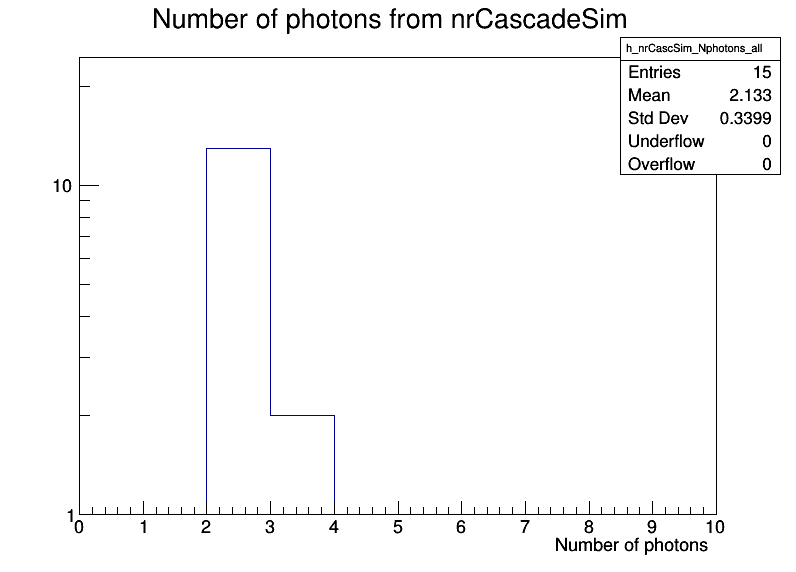

In [13]:
#%jsroot on
h_nrCascSim_Nphotons_all.Draw()
rt.gPad.SetLogy()
c.Draw()
if(save_):
    c.SaveAs("nPhotonsNRCascade.png")

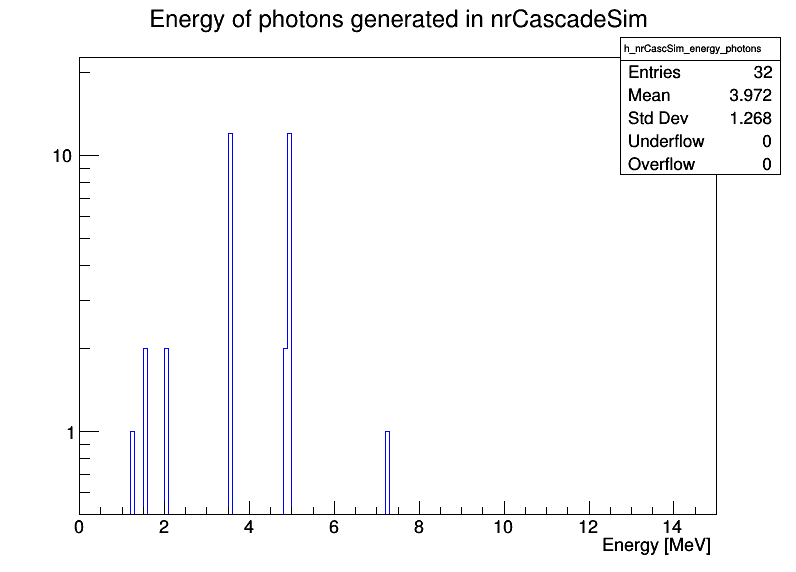

In [14]:
h_nrCascSim_energy_photons.SetLineColor(rt.kBlue)
h_nrCascSim_energy_photons.SetLineStyle(1)

h_nrCascSim_energy_photons.Draw()
rt.gPad.SetLogy()

c.Draw()
if(save_):
    c.SaveAs("EnergyEachPhotonsNRCascade.png")

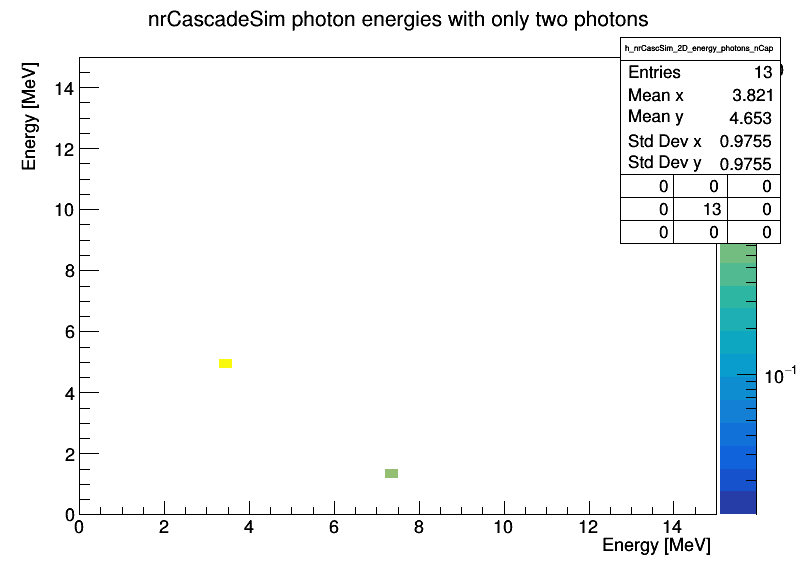

In [32]:
h_nrCascSim_2D_energy_photons_nCap.Draw("colz")
rt.gPad.SetLogz()
rt.gPad.SetLogy(0)
c.Draw()

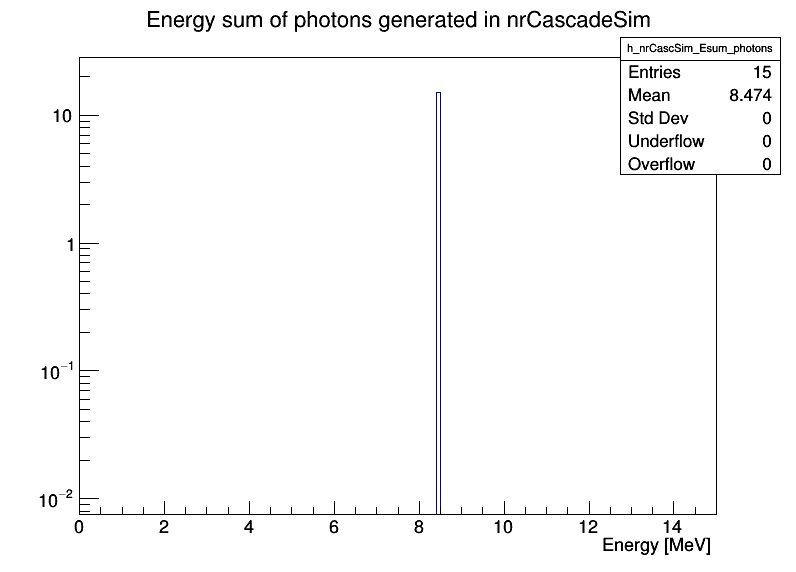

In [15]:
h_nrCascSim_Esum_photons.Draw()
rt.gPad.SetLogy()
c.Draw()
if(save_):
    c.SaveAs("EnergySumPhotonsNRCascade.png")

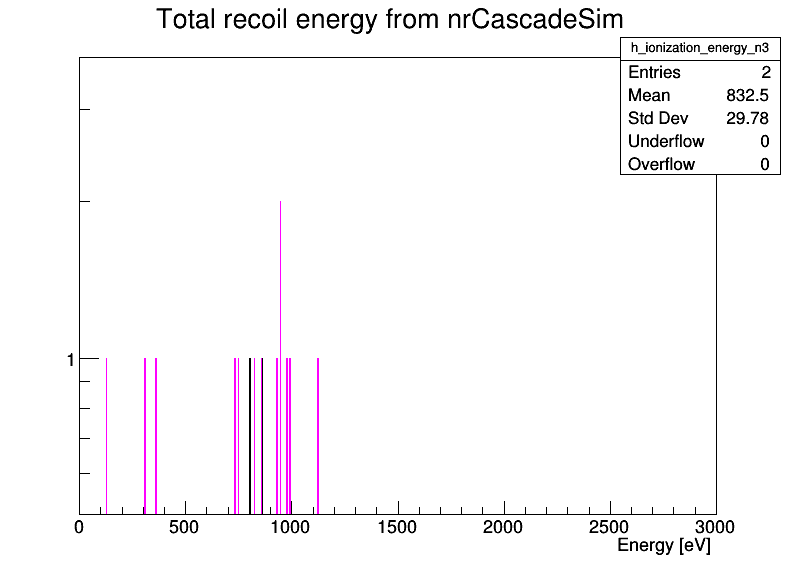

In [17]:
h_ionization_energy.Draw()
h_ionization_energy_n1.SetLineColor(rt.kRed)
h_ionization_energy_n2.SetLineColor(rt.kMagenta)
h_ionization_energy_n3.SetLineColor(rt.kBlack)
h_ionization_energy_n1.Draw("sames")
h_ionization_energy_n2.Draw("sames")
h_ionization_energy_n3.Draw("sames")
rt.gPad.SetLogy()
c.Draw()
if(save_):
    c.SaveAs("recoilEnergy.png")

In [18]:
# k100 sim
h_k100sim_Nphotons_all = rt.TH1F("h_Nphotons_all","Number of photons from k100Sim",50,0,50)
h_k100sim_Nphotons_all.GetXaxis().SetTitle("Number of photons")

h_k100sim_energy_photons_all = rt.TH1F("h_energy_photons_all","Energy of all photons registered in Si (all interactions)",150,0,15)
h_k100sim_energy_photons_all.GetXaxis().SetTitle("Energy [MeV]")

h_k100sim_energy_photons_nCap = rt.TH1F("h_energy_photons_nCap","Energy of all photons registered in Si on nCap",150,0,15)
h_k100sim_energy_photons_nCap.GetXaxis().SetTitle("Energy [MeV]")

h_NaI_energy_photons_nCap = rt.TH1F("h_NaI_energy_photons_nCap","Energy of all photons registered in NaI on nCap",150,0,15)
h_NaI_energy_photons_nCap.GetXaxis().SetTitle("Energy [MeV]")

h_k100sim_energy_photons_nCap_parent = rt.TH1F("h_energy_photons_nCap_parent","Energies of photons originating from nCap (input from nrCascade)",150,0,15)
h_k100sim_energy_photons_nCap_parent.GetXaxis().SetTitle("Energy [MeV]")




# k100_sim 

for i in tqdm(range(len(eventid))):
    if(i in events_with_nCap_in_NaI):
        continue
    tracks = TS[i]/100000
    # #type(tracks)
    tracks = tracks.astype('int32')
    photon_tracks = tracks[Type[i] == 22]
    photon_energy = E1[i][Type[i] == 22]
    photon_parents = P[i][Type[i] == 22]    
    photon_DT = DT[i][Type[i] == 22]
    unique_tracks, indices = np.unique(photon_tracks, return_index=True)
    photon_parents = photon_parents[indices]
    photon_DT = photon_DT[indices]
    h_k100sim_Nphotons_all.Fill(len(unique_tracks))
    
    for energy in photon_energy[indices]:
        h_k100sim_energy_photons_all.Fill(energy)
        
    Edep = 0.0
    if(nCap_flag[i]):
        for j,energy in enumerate(photon_energy[indices]):
            
            if(photon_DT[j] > 1):
                h_NaI_energy_photons_nCap.Fill(energy)
            else:
                h_k100sim_energy_photons_nCap.Fill(energy)
            if(photon_parents[j] == 0):
                h_k100sim_energy_photons_nCap_parent.Fill(energy)
#                 if(energy >= 1.8 and energy < 1.9):
#                     print("event = ",i)
#                     break
        
            
        
    

100%|█████████████████████████████████████████████████████████████████████████████████████| 1637037/1637037 [00:18<00:00, 87372.13it/s]


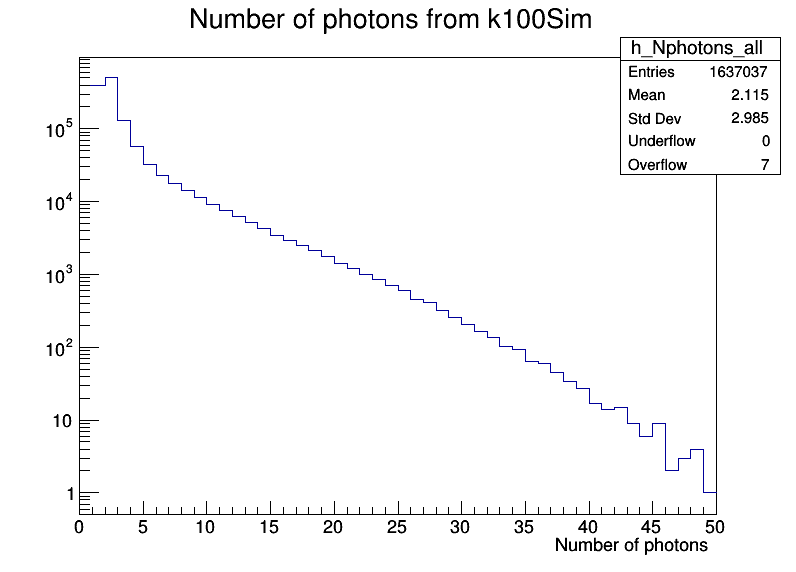

In [19]:
h_k100sim_Nphotons_all.Draw()
rt.gPad.SetLogy()
c.Draw()

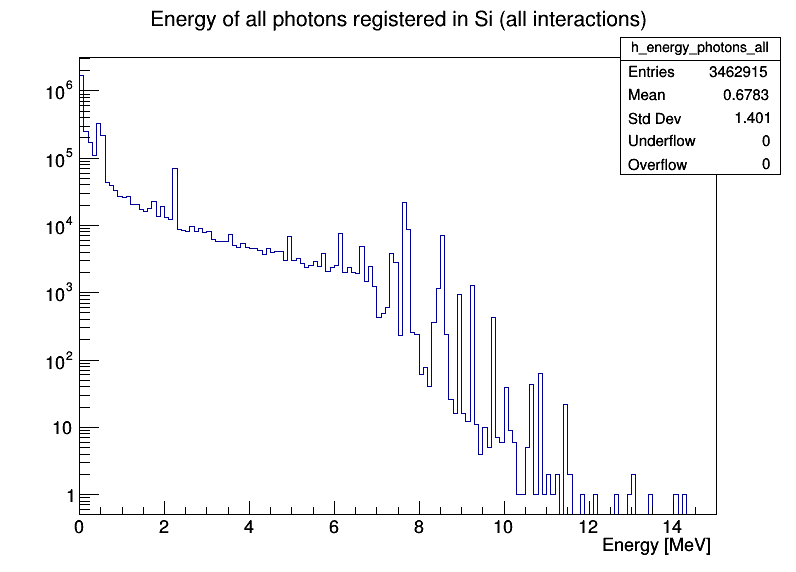

In [20]:
#h_energy_photons_all.Draw()
h_k100sim_energy_photons_all.Draw()

c.Draw()

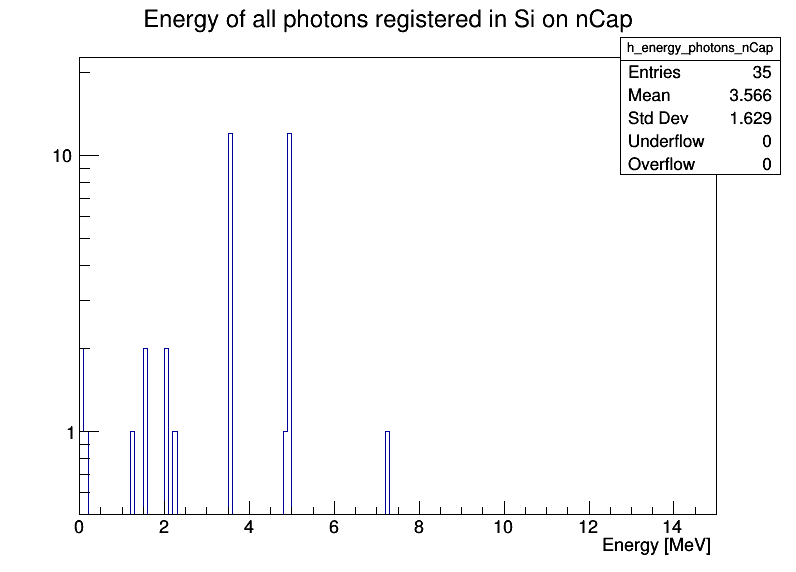

In [21]:
h_k100sim_energy_photons_nCap.Draw()
rt.gPad.SetLogy()
c.Draw()

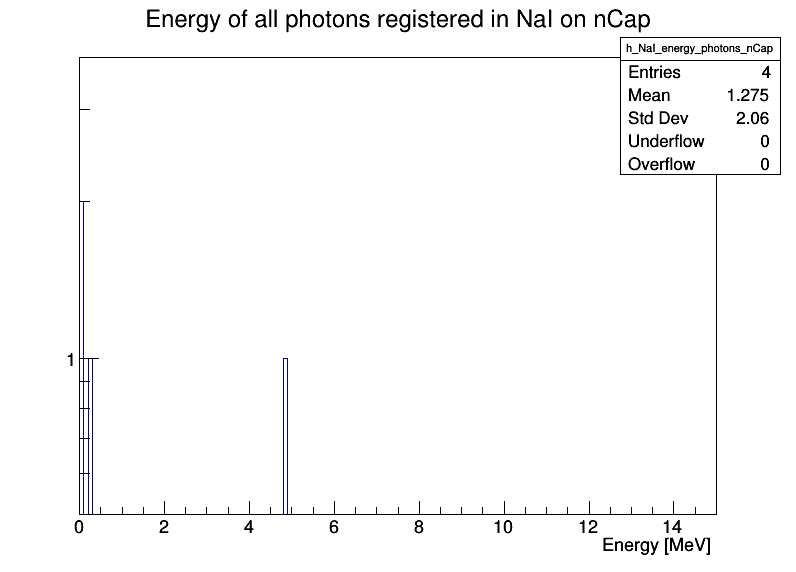

In [22]:
h_NaI_energy_photons_nCap.Draw()
c.Draw()

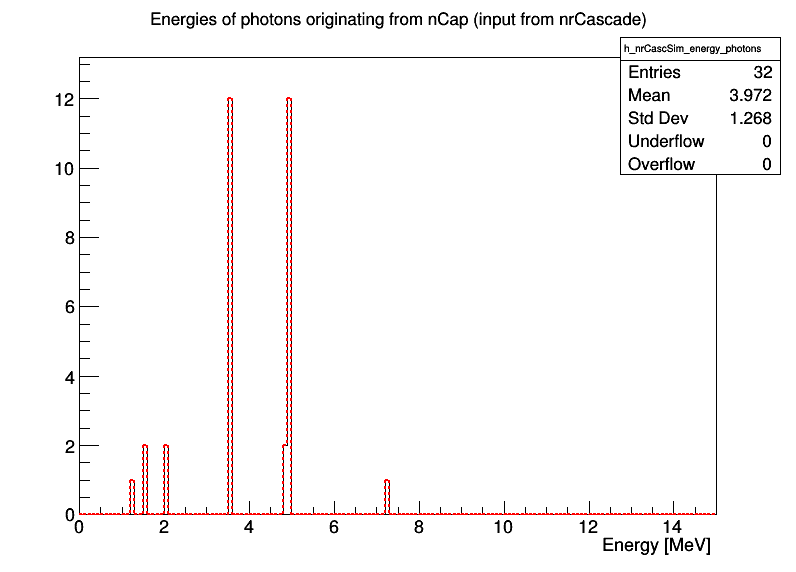

In [23]:
rt.gPad.SetLogy(0)
h_k100sim_energy_photons_nCap_parent.SetLineColor(rt.kBlack)
h_k100sim_energy_photons_nCap_parent.GetYaxis().SetRangeUser(0,1.10*h_k100sim_energy_photons_nCap_parent.GetMaximum())
h_k100sim_energy_photons_nCap_parent.Draw()
h_nrCascSim_energy_photons.SetLineColor(rt.kRed)
h_nrCascSim_energy_photons.SetLineStyle(2)
h_nrCascSim_energy_photons.SetLineWidth(2)
h_nrCascSim_energy_photons.Draw("sames")
#rt.gPad.SetLogy(0)
c.Draw()
if(save_):
    c.SaveAs("Ephotonk100_nrCascadeSim_linear.png")

In [ ]:
len(eventid)
len(range(26000,len(eventid)))

In [24]:
h_NaI_Edep_nCap = rt.TH1F("h_NaI_Edep_nCap","Energy deposited in NaI on nCap",150,0,15)
h_NaI_Edep_nCap.GetXaxis().SetTitle("Energy [MeV]")

h_NaI_Edep_nCap_v1 = rt.TH1F("h_NaI_Edep_nCap_v1","Energy deposited in NaI on nCap > 2.6 MeV",150,0,15)
h_NaI_Edep_nCap_v1.GetXaxis().SetTitle("Energy [MeV]")


h_k100sim_nrCascadeSim_energy_deposited = rt.TH2F("h_k100sim_nrCascadeSim_energy_deposited","energy deposited: nrCascadeSim vs k100Sim",15,0,15,1000,0,2000)
h_k100sim_nrCascadeSim_energy_deposited.GetXaxis().SetTitle("k100Sim energy deposited [MeV]")
h_k100sim_nrCascadeSim_energy_deposited.GetYaxis().SetTitle("nrCascadeSim ionization energy [eV]")

h_recoil_energy_no_cut = rt.TH1F("h_recoil_energy_no_cut","Total recoil energy from nrCascadeSim (No cut)",1000,0,3000)
h_recoil_energy_no_cut.GetXaxis().SetTitle("Energy [eV]")

h_recoil_energy_Edep_v1 = rt.TH1F("h_recoil_energy_Edep_v1","Total recoil energy from nrCascadeSim (ENaI > 2.6 MeV)",1000,0,3000)
h_recoil_energy_Edep_v1.GetXaxis().SetTitle("Energy [eV]")

# fig = plt.figure(figsize=(16.0,8.0))
n_Si_eV = 0
n_Si_all = 0
for i in tqdm(range(len(eventid))):
    if(not nCap_flag[i]):
        continue
    if(i in events_with_nCap_in_NaI):
        continue
    #print ("hello")
    Eion = 0.
    for energy in delE[i]:
        Eion += energy 
    Edep_Si = 0.
    Edep_NaI = 0.
    for j,energy in enumerate(D3[i]):
        if(DT[i][j] == 1):
            Edep_Si += energy
        else:
            Edep_NaI += energy
    recoil = np.sum(delE[i])
    if(Edep_Si == 0.):
        #plt.scatter(Edep_Si,Eion,c="red",marker='o',s=100.0)
        n_Si_eV += 1
    else:
        #plt.scatter(Edep_Si,Eion,c="blue",marker='o',s=100.0)
        1 == 1
    n_Si_all += 1
    if(Edep_NaI > 0):
        h_NaI_Edep_nCap.Fill(Edep_NaI)
        h_recoil_energy_no_cut.Fill(recoil)
    h_k100sim_nrCascadeSim_energy_deposited.Fill(Edep_Si,Eion)
    if(Edep_NaI > 2.6):
        h_recoil_energy_Edep_v1.Fill(recoil)
        h_NaI_Edep_nCap_v1.Fill(Edep_NaI)
# plt.xlabel("k100Sim energy deposited [MeV]")
# plt.ylabel("nrCascadeSim energy deposited [eV]")
# plt.show()
# plt.SaveAs("Edep_k100_nrcascade_2D.png")

print("All event = ",n_Si_all)
print("No Edep in Si = ",n_Si_eV)

100%|███████████████████████████████████████████████████████████████████████████████████| 1637037/1637037 [00:00<00:00, 6209692.47it/s]


All event =  15
No Edep in Si =  8


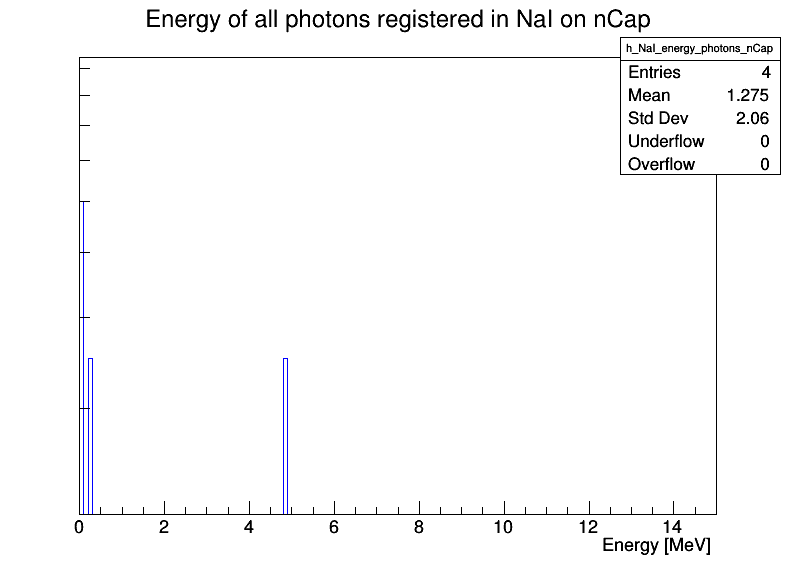

In [25]:
# h_NaI_Edep_nCap.DrawNormalized("hist")
# h_NaI_energy_photons_nCap.SetLineStyle(2)
# h_NaI_energy_photons_nCap.SetLineWidth(2)
h_NaI_energy_photons_nCap.SetLineColor(rt.kBlue)
h_NaI_energy_photons_nCap.DrawNormalized("hist")
rt.gPad.SetLogy()
c.Draw()
if(save_):
    c.SaveAs("PhotonsInterceptedNaI.png")

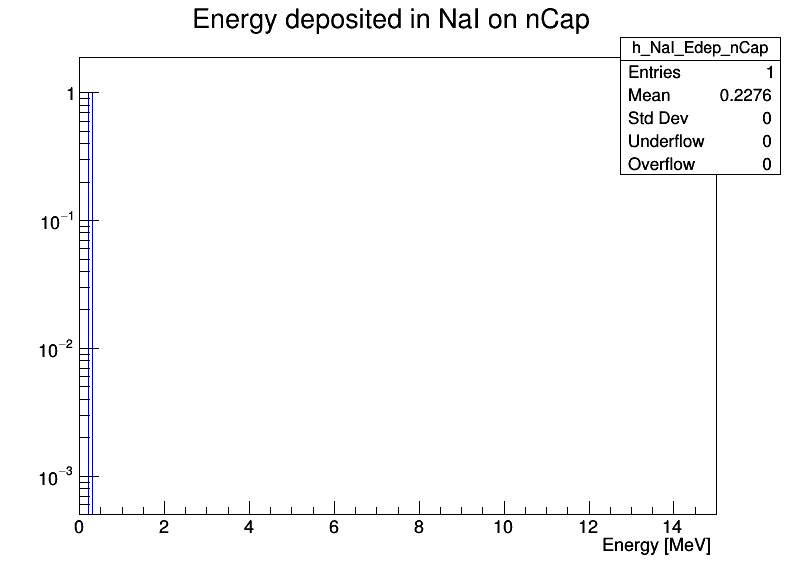

In [26]:


# h_nrCascSim_energy_photons.SetLineStyle(2)
# h_nrCascSim_energy_photons.SetLineWidth(2)
# h_nrCascSim_energy_photons.SetLineColor(rt.kRed)
# h_nrCascSim_energy_photons.DrawNormalized("hist")
h_NaI_Edep_nCap.DrawNormalized("hist")
rt.gPad.SetLogy()
c.Draw()
if(save_):
    c.SaveAs("EdepositedNaI_overlay.png")

Error in <TH1F::DrawNormalized>: Sum of weights is null. Cannot normalize histogram: h_NaI_Edep_nCap_v1


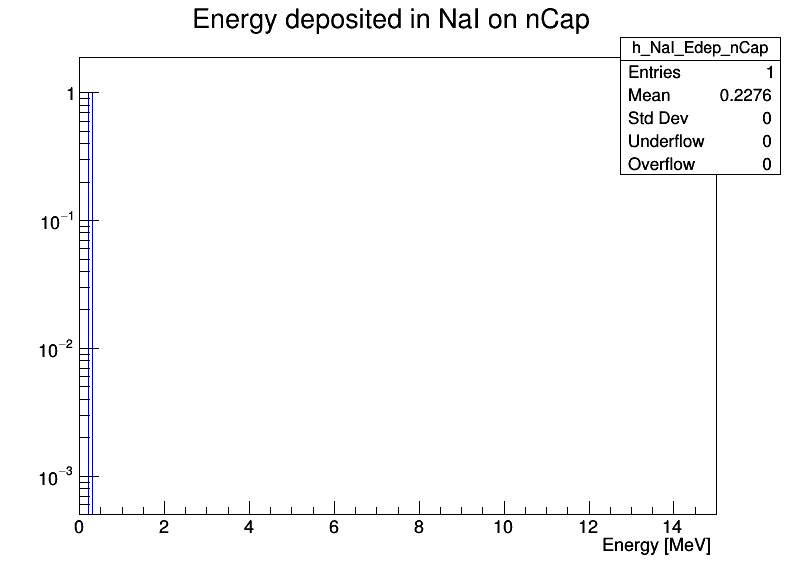

In [27]:
h_NaI_Edep_nCap_v1.DrawNormalized("hist")
rt.gPad.SetLogy()
c.Draw()

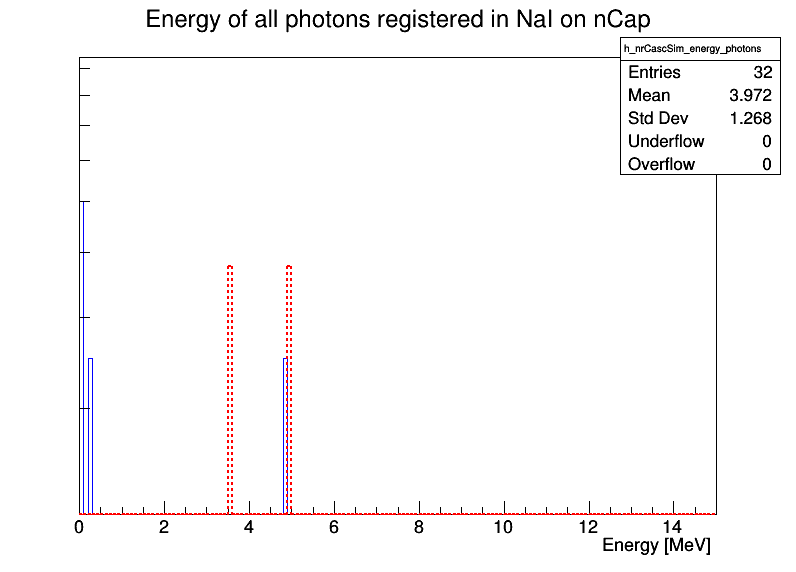

In [28]:
h_NaI_energy_photons_nCap.SetLineStyle(1)
h_NaI_energy_photons_nCap.SetLineWidth(1)
h_NaI_energy_photons_nCap.SetLineColor(rt.kBlue)
h_NaI_energy_photons_nCap.DrawNormalized("hist")
h_nrCascSim_energy_photons.SetLineStyle(2)
h_nrCascSim_energy_photons.SetLineWidth(2)
h_nrCascSim_energy_photons.SetLineColor(rt.kRed)
h_nrCascSim_energy_photons.DrawNormalized("hist sames")
rt.gPad.SetLogy()
c.Draw()

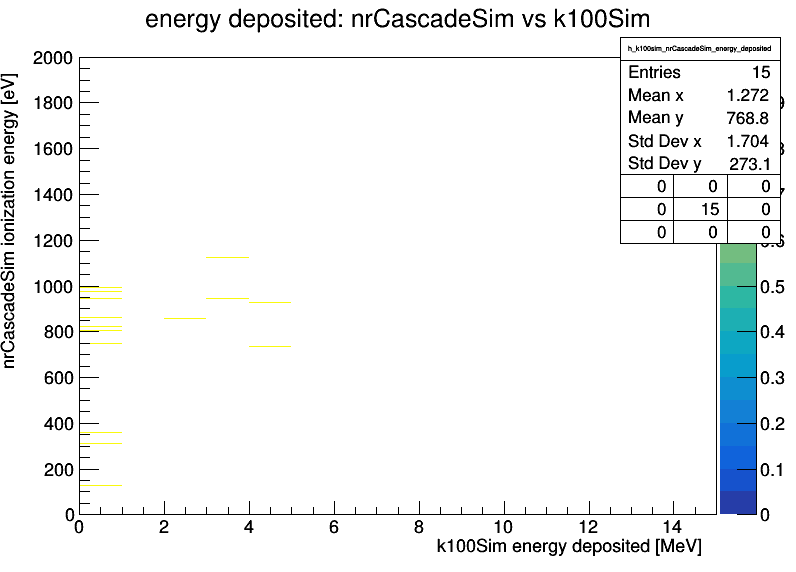

In [29]:
h_k100sim_nrCascadeSim_energy_deposited.Draw("colz")
rt.gPad.SetLogy(0)
c.Draw()

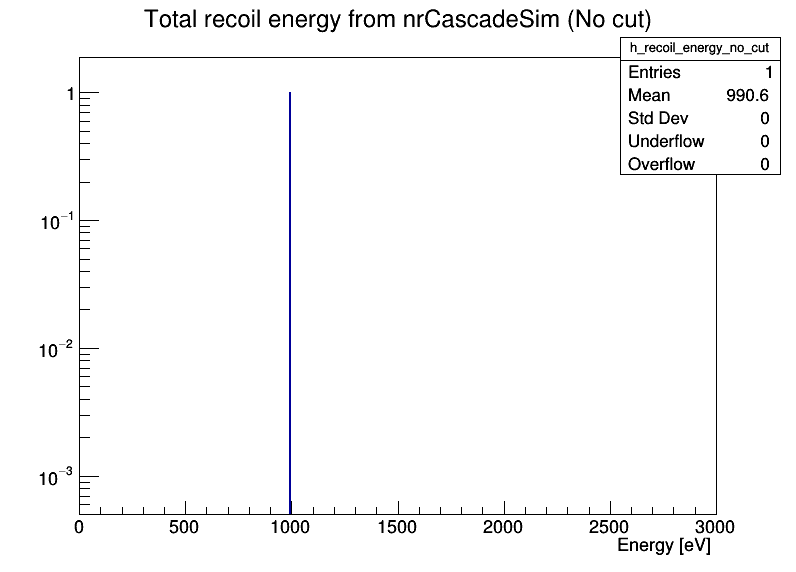

In [30]:
rt.gPad.SetLogy(1)
h_recoil_energy_no_cut.Draw()
c.Draw()

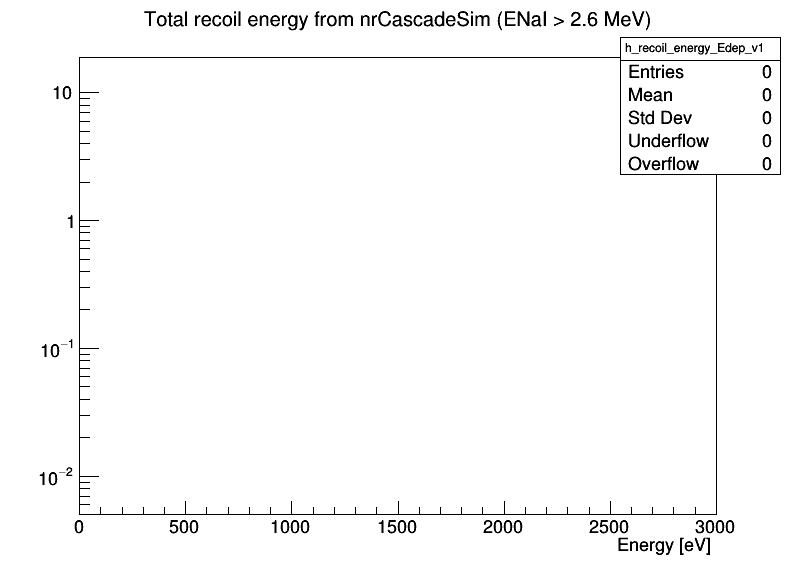

In [31]:
rt.gPad.SetLogy(1)
h_recoil_energy_Edep_v1.Draw()
c.Draw()

In [33]:
h_recoil_energy_no_cut.Draw()
h_recoil_energy_Edep_v1.SetLineColor(rt.kRed)
h_recoil_energy_Edep_v1.Draw("sames")
c.Draw()